# Testing Image 3D Mapping 


In [7]:
import sys
sys.version

'3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]'

In [8]:
import ipywidgets as widgets 
from IPython.display import display
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import  numpy as np

%matplotlib nbagg

In [9]:
! curl -O https://mir-s3-cdn-cf.behance.net/project_modules/disp/96701647544579.56080a36b6483.png 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 24900  100 24900    0     0   258k      0 --:--:-- --:--:-- --:--:--  258k


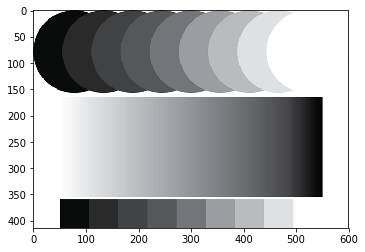

In [10]:
img = plt.imread('96701647544579.56080a36b6483.png ')
plt.imshow(img)